# Logistic regression for default prediction

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gaarutyunov/credit-risk/blob/master/notebooks/colab_log_reg.ipynb)

## Environment settings

For better performance change Colab runtime type to GPU

In [1]:
!git clone https://github.com/gaarutyunov/credit-risk.git

Cloning into 'credit-risk'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 186 (delta 99), reused 143 (delta 56), pack-reused 0
Receiving objects: 100% (186/186), 739.81 KiB | 12.75 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [2]:
%cd credit-risk

/content/credit-risk


In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sberbank-ai/wing.git (to revision master) to /tmp/pip-install-xzkdjoyg/wing_f9ae902b47084ab689ebb423d2237f3b
  Running command git clone -q https://github.com/sberbank-ai/wing.git /tmp/pip-install-xzkdjoyg/wing_f9ae902b47084ab689ebb423d2237f3b
     |████████████████████████████████| 151 kB 5.1 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 
     |████████████████████████████████| 76.6 MB 1.1 MB/s 
     |████████████████████████████████| 155 kB 66.7 MB/s 
     |████████████████████████████████| 117 kB 70.8 MB/s 
     |████████████████████████████████| 596 kB 67.3 MB/s 
  Created wheel for wing: filename=wing-0.1.6-py3-none-any.whl size=12768 sha256=fbba1e47ceca4d7050116ae2c4ffce62c295a832a66096262da672972f62031d
  Stored in directory: /tmp/pip-ephem-wheel-cache-heitlasf/wheels/d0/d3/78/d1cb5717341968f8319fa57765f68a894fc1b21d4f4068b519
  Created w

To get username and key follow instructions in [readme](https://github.com/Kaggle/kaggle-api)

In [ ]:
%env KAGGLE_USERNAME=<username>
%env KAGGLE_KEY=<key>

In [5]:
!kaggle datasets download wordsforthewise/lending-club

100% 1.26G/1.26G [00:09<00:00, 172MB/s]
100% 1.26G/1.26G [00:09<00:00, 145MB/s]


In [6]:
!unzip lending-club.zip

Archive:  lending-club.zip
  inflating: accepted_2007_to_2018Q4.csv.gz  
  inflating: accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv  
  inflating: rejected_2007_to_2018Q4.csv.gz  
  inflating: rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv  


In [7]:
!mkdir data

In [8]:
!mv accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv data/accepted_2007_to_2018Q4.csv
!mv rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv data/rejected_2007_to_2018Q4.csv

## Preprocessing

In [9]:
from pipeline import get_pipeline

preprocessing = get_pipeline(
    name="log_reg",
    group='preprocessing',
    debug=True,
)

_target_: pipeline.make_preprocessing_pipeline
steps_config:
- CSVReader:
    _target_: pipeline.CSVReader
    _convert_: all
    file: data/accepted_2007_to_2018Q4.csv
    columns:
    - loan_amnt
    - term
    - int_rate
    - emp_title
    - emp_length
    - home_ownership
    - annual_inc
    - verification_status
    - loan_status
    - purpose
    - addr_state
    - dti
    - earliest_cr_line
    - fico_range_high
    - inq_last_6mths
    - revol_bal
    - initial_list_status
    - out_prncp
    - total_rec_late_fee
    - collection_recovery_fee
    - last_fico_range_low
    - collections_12_mths_ex_med
    - application_type
    - tot_coll_amt
    - avg_cur_bal
    - bc_open_to_buy
    - chargeoff_within_12_mths
    - delinq_amnt
    - mo_sin_old_il_acct
    - mo_sin_old_rev_tl_op
    - mo_sin_rcnt_tl
    - mort_acc
    - mths_since_recent_bc
    - num_accts_ever_120_pd
    - num_actv_bc_tl
    - num_bc_tl
    - num_il_tl
    - num_sats
    - num_tl_120dpd_2m
    - num_tl_30dpd

In [10]:
X = preprocessing.fit_transform([], y=[])
y = preprocessing.label_transformer.label

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:355: UserWarning: Persisting input arguments took 45.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name],
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:355: UserWarning: Persisting input arguments took 45.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name],


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=True
)

## Training

To train with CPU remove overrides

In [12]:
from pipeline import get_pipeline

classifier = get_pipeline(
    name="log_reg",
    group='classifier',
    debug=True,
)

_target_: pipeline.make_pipeline
name: classifier
steps_config:
- Classifier:
    _target_: sklearn.linear_model.LogisticRegression
    _convert_: all
    class_weight: balanced



In [13]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(memory='./.cache/classifier',
         steps=[('Classifier', LogisticRegression(class_weight='balanced'))])

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9376720996778856

In [16]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.9227695582558155

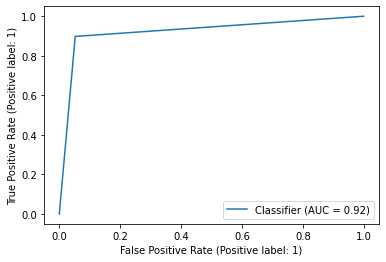

In [17]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

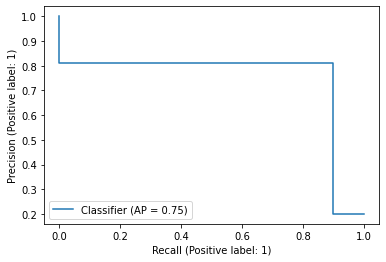

In [18]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_pred)

In [19]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred)

0.7486328973875749

In [20]:
from joblib import dump

dump(classifier, 'models/log_reg.joblib')

['models/log_reg.joblib']